## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/Sample - Superstore.csv', encoding='ISO-8859-1')

## Convert Date Columns

In [2]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Month'] = df['Order Date'].dt.to_period('M')

## Check for Missing or Dirty Data

In [3]:
df.isnull().sum()  # No missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Month      0
dtype: int64

## Check for Unusual Values

In [4]:
df[['Sales', 'Profit', 'Discount']].describe()
(df['Profit'] < 0).sum()  # 1,871 rows have losses

np.int64(1871)

## Reset index after filtering

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


## The code after cleaning the data

In [7]:
# run this only once
!pip install matplotlib seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create visuals folder if not exist

In [9]:
os.makedirs("visuals", exist_ok=True)

# Group by Region and Segment

In [10]:
grouped = df.groupby(['Region', 'Segment'])[['Sales', 'Profit']].sum().reset_index()

     Region      Segment        Sales      Profit
0   Central     Consumer  252031.4340   8564.0481
1   Central    Corporate  157995.8128  18703.9020
2   Central  Home Office   91212.6440  12438.4124
3      East     Consumer  350908.1670  41190.9843
4      East    Corporate  200409.3470  23622.5789
5      East  Home Office  127463.7260  26709.2168
6     South     Consumer  195580.9710  26913.5728
7     South    Corporate  121885.9325  15215.2232
8     South  Home Office   74255.0015   4620.6343
9      West     Consumer  362880.7730  57450.6040
10     West    Corporate  225855.2745  34437.4299
11     West  Home Office  136721.7770  16530.4150


# Plot: Sales by Region and Segment

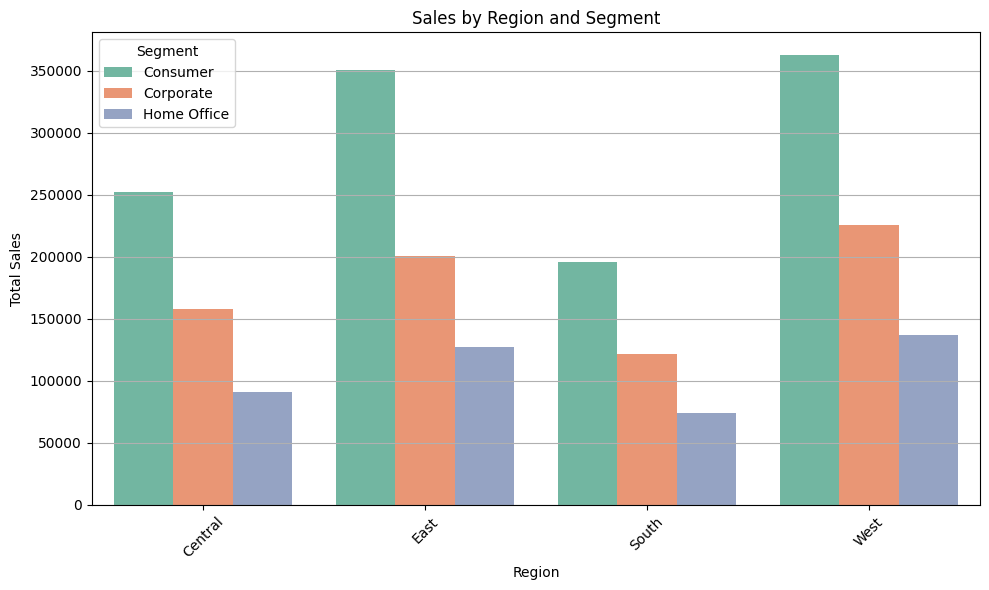

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Region', y='Sales', hue='Segment', palette='Set2')
plt.title('Sales by Region and Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Save to visuals folder

In [14]:
plt.savefig('visuals/sales_by_region_segment.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>